In [155]:
# imports
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [156]:
# initialize Ticker object
msft = yf.Ticker("MSFT")

In [157]:
# get Closing price dataframe
df = msft.history(start="2016-01-01")[["Close"]]
# create the log series for TSA 
ser = np.log(df.Close)

In [160]:
# creates size for train, test split
size = int(np.round(len(df) * 0.75, 2))
size

1386

In [161]:
train, test = ser[:size], ser[size:]

In [162]:
hist = [x for x in train]
preds = []

In [163]:
for t in range(len(test)):
    model = ARIMA(hist, order=(5, 2, 0))
    fitted_model = model.fit()
    pred = fitted_model.forecast()
    preds.append(pred[0])
    hist.append(test[t])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

In [164]:
rmse = np.sqrt(np.mean((test.to_numpy() - preds) ** 2))
rmse

0.021975942846251838

In [175]:
df = test.to_frame()
df["Predictions"] = preds
df["Close"] = np.exp(df.Close)
df["Predictions"] = np.exp(df.Predictions)

In [177]:
forecast = np.exp(fitted_model.forecast(5))
for i in range(5):
   df.loc[df.index[-1] + pd.Timedelta('1day')] = [np.NaN, forecast[i]]

<AxesSubplot:xlabel='Date'>

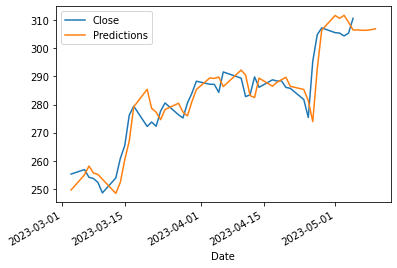

In [178]:
df[-50:].plot()